In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

## Data Exploration

In [5]:
df = pd.read_csv('youtubers_df.csv')

In [6]:
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


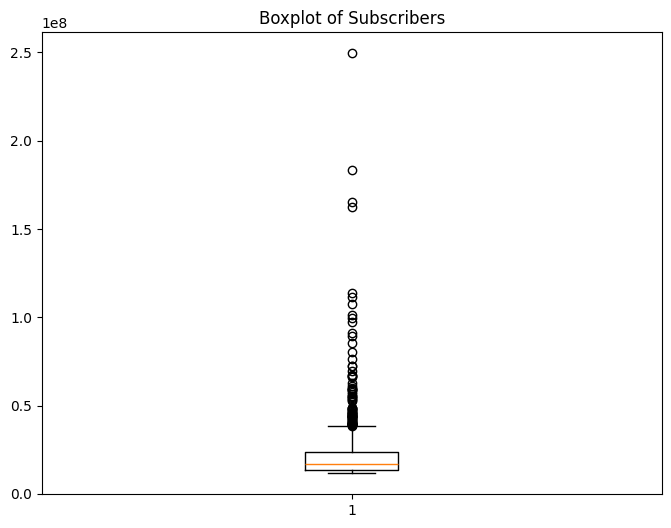

In [39]:
#Identifying outliers
#Creating a box plot to visualize the 'subscribers' column
plt.figure(figsize=(8,6))
plt.boxplot(df['Suscribers'])
plt.title('Boxplot of Subscribers')
plt.show()

In [94]:
#Removing Outliers
#Step 1: Calculating the interquartile range (IQR)
Q1 = df['Suscribers'].quantile(0.25)
Q3 = df['Suscribers'].quantile(0.75)
IQR = Q3-Q1

#Step 2: Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR 

#Step 3: Filter outliers
outliers_removed = df[(df['Suscribers'] > lower_bound) & (df['Suscribers'] < upper_bound)]

#Step 4: Displaying filtered Dataframe without outliers
outliers_removed

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
79,80,TheEllenShow,NaN,38300000.0,Estados Unidos,26000.0,433.0,22.0,http://youtube.com/channel/UCp0hYYBW6IMayGgR-W...
80,81,DaddyYankee,Música y baile,38300000.0,Colombia,82800.0,6500.0,123.0,http://youtube.com/channel/UC9TO_oo4c_LrOiKNaY...
81,82,LikeNastya_ESP,NaN,38100000.0,Unknown,403800.0,1800.0,0.0,http://youtube.com/channel/UCpEJRZdSpdVZ8vh63T...
82,83,one31official,NaN,38100000.0,Tailandia,4800.0,122.0,1.0,http://youtube.com/channel/UC8f7MkX4MFOOJ2SerX...
83,84,ABPNEWS,NaN,38100000.0,India,2400.0,59.0,0.0,http://youtube.com/channel/UCRWFSbif-RFENbBrSi...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


In [95]:
df_cleaned = outliers_removed.dropna()
df_cleaned

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
80,81,DaddyYankee,Música y baile,38300000.0,Colombia,82800.0,6500.0,123.0,http://youtube.com/channel/UC9TO_oo4c_LrOiKNaY...
84,85,MariaClaraeJP,"Películas, Animación",37700000.0,Unknown,1700000.0,10800.0,0.0,http://youtube.com/channel/UCKe6w0exI94U-RzqAy...
86,87,PowerKidstv,"Películas, Animación",37400000.0,India,41700.0,0.0,0.0,http://youtube.com/channel/UCj-SWZSE0AmotGSQ3a...
89,90,SaregamaMusic,Películas,37000000.0,India,27300.0,703.0,26.0,http://youtube.com/channel/UC_A7K2dXFsTMAciGmn...
90,91,RicisOfficial1795,"Música y baile, Películas",36900000.0,Indonesia,343800.0,27500.0,357.0,http://youtube.com/channel/UC4tS4Q_Cno5JVcIUXx...
...,...,...,...,...,...,...,...,...,...
989,990,cut,Humor,11700000.0,Estados Unidos,359000.0,8800.0,342.0,http://youtube.com/channel/UCbaGn5VkOVlcRgIWAH...
990,991,JoeHattab,Películas,11700000.0,Somalia,1900000.0,98500.0,2900.0,http://youtube.com/channel/UCe6eisvsctSPvBhmin...
991,992,BeAmazed,Educación,11700000.0,Estados Unidos,477800.0,9900.0,556.0,http://youtube.com/channel/UCkQO3QsgTpNTsOw6uj...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...


In [96]:
youtubedata = df_cleaned
youtubedata

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
80,81,DaddyYankee,Música y baile,38300000.0,Colombia,82800.0,6500.0,123.0,http://youtube.com/channel/UC9TO_oo4c_LrOiKNaY...
84,85,MariaClaraeJP,"Películas, Animación",37700000.0,Unknown,1700000.0,10800.0,0.0,http://youtube.com/channel/UCKe6w0exI94U-RzqAy...
86,87,PowerKidstv,"Películas, Animación",37400000.0,India,41700.0,0.0,0.0,http://youtube.com/channel/UCj-SWZSE0AmotGSQ3a...
89,90,SaregamaMusic,Películas,37000000.0,India,27300.0,703.0,26.0,http://youtube.com/channel/UC_A7K2dXFsTMAciGmn...
90,91,RicisOfficial1795,"Música y baile, Películas",36900000.0,Indonesia,343800.0,27500.0,357.0,http://youtube.com/channel/UC4tS4Q_Cno5JVcIUXx...
...,...,...,...,...,...,...,...,...,...
989,990,cut,Humor,11700000.0,Estados Unidos,359000.0,8800.0,342.0,http://youtube.com/channel/UCbaGn5VkOVlcRgIWAH...
990,991,JoeHattab,Películas,11700000.0,Somalia,1900000.0,98500.0,2900.0,http://youtube.com/channel/UCe6eisvsctSPvBhmin...
991,992,BeAmazed,Educación,11700000.0,Estados Unidos,477800.0,9900.0,556.0,http://youtube.com/channel/UCkQO3QsgTpNTsOw6uj...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...


In [97]:
youtubedata.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
80,81,DaddyYankee,Música y baile,38300000.0,Colombia,82800.0,6500.0,123.0,http://youtube.com/channel/UC9TO_oo4c_LrOiKNaY...
84,85,MariaClaraeJP,"Películas, Animación",37700000.0,Unknown,1700000.0,10800.0,0.0,http://youtube.com/channel/UCKe6w0exI94U-RzqAy...
86,87,PowerKidstv,"Películas, Animación",37400000.0,India,41700.0,0.0,0.0,http://youtube.com/channel/UCj-SWZSE0AmotGSQ3a...
89,90,SaregamaMusic,Películas,37000000.0,India,27300.0,703.0,26.0,http://youtube.com/channel/UC_A7K2dXFsTMAciGmn...
90,91,RicisOfficial1795,"Música y baile, Películas",36900000.0,Indonesia,343800.0,27500.0,357.0,http://youtube.com/channel/UC4tS4Q_Cno5JVcIUXx...


In [52]:
youtubedata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 633 entries, 80 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        633 non-null    int64  
 1   Username    633 non-null    object 
 2   Categories  633 non-null    object 
 3   Suscribers  633 non-null    float64
 4   Country     633 non-null    object 
 5   Visits      633 non-null    float64
 6   Likes       633 non-null    float64
 7   Comments    633 non-null    float64
 8   Links       633 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 49.5+ KB


In [53]:
print(youtubedata.isnull().sum())  

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64


## TREND ANALYSIS

In [54]:
category_counts = youtubedata['Categories'].value_counts()
print(category_counts)

Categories
Música y baile                        132
Películas, Animación                   53
Música y baile, Películas              40
Vlogs diarios                          36
Noticias y Política                    35
Animación, Videojuegos                 34
Películas, Humor                       32
Animación, Humor                       26
Animación, Juguetes                    24
Películas                              23
Animación                              22
Educación                              22
Videojuegos, Humor                     16
Videojuegos                            16
Música y baile, Animación              15
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Deportes                                8
Juguetes                                7
Películas, Videojuegos                  7
Películas, Juguetes                     7
Música y baile, Humor                   6
Juguetes, Coches y vehí

## From this, looking at the most popular categories, we can observe that generally 'Música y baile' has the most engagements.

In [77]:
country_counts = youtubedata['Country'].value_counts()
print(country_counts)

Country
Estados Unidos    210
Unknown           118
India              96
Brasil             47
México             39
Indonesia          30
Rusia              21
Colombia           14
Filipinas          10
Tailandia           9
Pakistán            5
Argentina           5
Reino Unido         3
España              3
Arabia Saudita      3
Bangladesh          3
Turquía             3
Perú                2
Egipto              2
Iraq                2
Marruecos           2
Jordania            1
Francia             1
Singapur            1
Argelia             1
Japón               1
Somalia             1
Name: count, dtype: int64


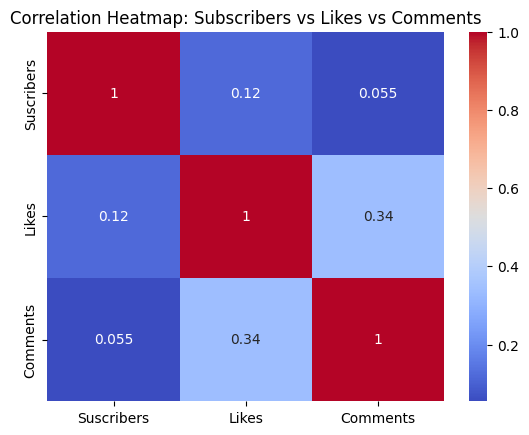

In [56]:
corr_matrix = youtubedata[['Suscribers', 'Likes', 'Comments']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Subscribers vs Likes vs Comments')
plt.show()

## AUDIENCE STUDY

In [57]:
grouped_data = youtubedata.groupby(['Country', 'Categories']).size().reset_index(name='Streamer_Count')

# Analyze the distribution of streamers' audiences by country and content category
print(grouped_data)

            Country              Categories  Streamer_Count
0    Arabia Saudita  Animación, Videojuegos               1
1    Arabia Saudita          Música y baile               2
2           Argelia               Educación               1
3         Argentina               Animación               1
4         Argentina               Películas               1
..              ...                     ...             ...
164         Unknown        Películas, Humor               5
165         Unknown     Películas, Juguetes               7
166         Unknown  Películas, Videojuegos               1
167         Unknown   Videojuegos, Juguetes               2
168         Unknown           Vlogs diarios               7

[169 rows x 3 columns]


In [15]:
# Determine regional preferences for specific content categories
preferred_categories_by_country = grouped_data.groupby('Country')['Categories'].agg(lambda x: x.value_counts().index[0])
print(preferred_categories_by_country)

Country
Arabia Saudita        Animación, Videojuegos
Argelia                            Educación
Argentina                          Animación
Bangladesh               Noticias y Política
Brasil                             Animación
Colombia                    Animación, Humor
Egipto             Música y baile, Películas
España                  Películas, Animación
Estados Unidos                          ASMR
Filipinas                              Humor
Francia           Animación, Humor, Juguetes
India                 Animación, Videojuegos
Indonesia             Animación, Videojuegos
Iraq                  Animación, Videojuegos
Japón                                  Humor
Jordania                      Música y baile
Marruecos                Noticias y Política
México                             Animación
Pakistán                      Música y baile
Perú                          Música y baile
Reino Unido        Música y baile, Películas
Rusia                              Animación
Si

## PERFORMANCE METRICS

In [58]:
avg_subscribers = youtubedata['Suscribers'].mean()
avg_visits = youtubedata['Visits'].mean()
avg_likes = youtubedata['Likes'].mean()
avg_comments = youtubedata['Comments'].mean()

In [59]:
print("Average Subscribers:", avg_subscribers)
print("Average Visits:", avg_visits)
print("Average Likes:", avg_likes)
print("Average Comments:", avg_comments)

Average Subscribers: 18299210.11058452
Average Visits: 1027088.6255924171
Average Likes: 46336.62559241706
Average Comments: 1538.2985781990521


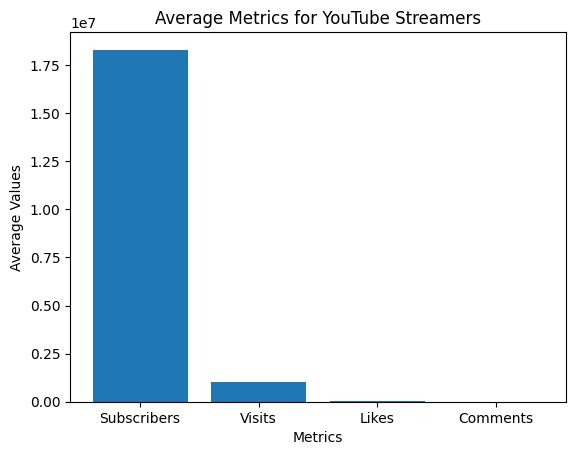

In [60]:
metrics = ['Subscribers', 'Visits', 'Likes', 'Comments']
averages = [avg_subscribers, avg_visits, avg_likes, avg_comments]

plt.bar(metrics, averages)
plt.xlabel('Metrics')
plt.ylabel('Average Values')
plt.title('Average Metrics for YouTube Streamers')
plt.show()

## CONTENT CATEGORIES

In [75]:
# Count streamers by category
streamers_by_category = youtubedata['Categories'].value_counts()

top_categories = streamers_by_category.head(10)
print("Top Categories:")
print(top_categories)

Top Categories:
Categories
Música y baile               132
Películas, Animación          53
Música y baile, Películas     40
Vlogs diarios                 36
Noticias y Política           35
Animación, Videojuegos        34
Películas, Humor              32
Animación, Humor              26
Animación, Juguetes           24
Películas                     23
Name: count, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Música y baile'),
  Text(1, 0, 'Películas, Animación'),
  Text(2, 0, 'Música y baile, Películas'),
  Text(3, 0, 'Vlogs diarios'),
  Text(4, 0, 'Noticias y Política'),
  Text(5, 0, 'Animación, Videojuegos'),
  Text(6, 0, 'Películas, Humor'),
  Text(7, 0, 'Animación, Humor'),
  Text(8, 0, 'Animación, Juguetes'),
  Text(9, 0, 'Películas')])

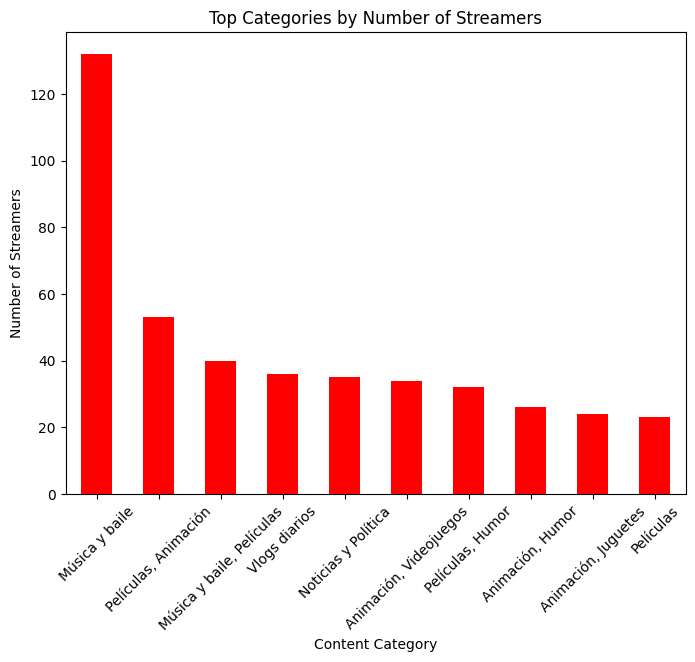

In [76]:
#Visualizing the distribution of streamers by content category

plt.figure(figsize=(8, 6))
top_categories.plot(kind='bar', color='red')
plt.title('Top Categories by Number of Streamers')
plt.xlabel('Content Category')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45)

In [70]:
# Analyze performance metrics
performance_metrics = ['Likes', 'Comments']
average_metrics_by_category = youtubedata.groupby('Categories')[performance_metrics].mean()

In [73]:
# Identify categories with exceptional performance
threshold_likes = average_metrics_by_category['Likes'].quantile(0.75)
threshold_comments = average_metrics_by_category['Comments'].quantile(0.75)

exceptional_categories = average_metrics_by_category[
    (average_metrics_by_category['Likes'] > threshold_likes) &
    (average_metrics_by_category['Comments'] > threshold_comments)
     ]

In [74]:
print("Categories with Exceptional Performance:")
exceptional_categories

Categories with Exceptional Performance:


,Likes,Comments
Categories,,
"Animación, Humor",138667.115385,4704.384615
"Animación, Videojuegos",79294.029412,3786.617647
Animales y mascotas,102750.000000,2806.000000
Comida y bebida,128664.750000,3053.416667
"Diseño/arte, DIY y Life Hacks",127300.000000,2200.000000
Humor,169990.000000,5159.800000
"Videojuegos, Humor",115543.750000,3972.500000


## Brands and Collaborations

In [98]:
metrics = ['Suscribers', 'Likes', 'Comments']
streamer_performance = youtubedata.groupby('Username')[metrics].sum()

threshold_likes = streamer_performance['Likes'].quantile(0.75)
threshold_comments = streamer_performance['Comments'].quantile(0.75)
threshold_subscribers = streamer_performance['Suscribers'].quantile(0.75)


high_performance_streamers = streamer_performance[
    (streamer_performance['Likes'] >= threshold_likes) &
    (streamer_performance['Comments'] >= threshold_comments) &
    (streamer_performance['Suscribers'] >= threshold_subscribers)
]

print("High-Performing Content Creators:")
print(high_performance_streamers[[ 'Suscribers', 'Likes', 'Comments']])

High-Performing Content Creators:
                          Suscribers      Likes  Comments
Username                                                 
AboFlah                   32700000.0   382000.0   11400.0
AlejoIgoa                 25700000.0   208400.0    1700.0
AmiRodrigueZZ             22900000.0   294400.0    1300.0
BenAzelart                22500000.0    44900.0    2700.0
DaFuqBoom                 29800000.0  1700000.0   82800.0
DanTDM                    27800000.0   285000.0   52500.0
JamesCharles              23900000.0    62300.0    1100.0
LosPolinesios             25700000.0    38400.0     866.0
MrBeast2                  31300000.0  5000000.0   11600.0
NichLmao                  27500000.0    85800.0    1600.0
RAFAELUIZOFICIAL          22100000.0    30500.0     522.0
SSSniperWolf              34200000.0    34600.0    2100.0
SSundee                   22700000.0    59800.0    1800.0
SandeepSeminars           28000000.0    58500.0    4000.0
StokesTwins               22700000.0  

### Brief Explanation

The code snippet provided performs the following operations:

- It defines a list of metrics, including 'Subscribers', 'Likes', and 'Comments'. It groups the data in the youtubedata DataFrame by the 'Username' column and calculates the sum of the metrics for each unique username. The resulting DataFrame is assigned to streamer_performance.
- It calculates the 75th percentile (quantile) values for 'Likes', 'Comments', and 'Subscribers' using the quantile function on the corresponding columns of streamer_performance. These quantile values act as thresholds for determining high-performance streamers.
- It filters the streamer_performance DataFrame, selecting only those rows where 'Likes' is greater than or equal to threshold_likes, 'Comments' is greater than or equal to threshold_comments, and 'Subscribers' is greater than or equal to threshold_subscribers. The filtered DataFrame is assigned to high_performance_streamers. 
- It prints the header "High-Performing Content Creators:" and displays the 'Subscribers', 'Likes', and 'Comments' columns of the high_performance_streamers DataFrame.

To analyze whether streamers with high performance metrics receive more brand collaborations and marketing campaigns, additional data not available in the dataset provided will be needed so that can't be determined from this given dataset.

## Benchmarking

In [83]:
youtubedata.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
80,81,DaddyYankee,Música y baile,38300000.0,Colombia,82800.0,6500.0,123.0,http://youtube.com/channel/UC9TO_oo4c_LrOiKNaY...
84,85,MariaClaraeJP,"Películas, Animación",37700000.0,Unknown,1700000.0,10800.0,0.0,http://youtube.com/channel/UCKe6w0exI94U-RzqAy...
86,87,PowerKidstv,"Películas, Animación",37400000.0,India,41700.0,0.0,0.0,http://youtube.com/channel/UCj-SWZSE0AmotGSQ3a...
89,90,SaregamaMusic,Películas,37000000.0,India,27300.0,703.0,26.0,http://youtube.com/channel/UC_A7K2dXFsTMAciGmn...
90,91,RicisOfficial1795,"Música y baile, Películas",36900000.0,Indonesia,343800.0,27500.0,357.0,http://youtube.com/channel/UC4tS4Q_Cno5JVcIUXx...


In [85]:
average_subscribers = youtubedata['Suscribers'].mean()
average_visits = youtubedata['Visits'].mean()
average_likes = youtubedata['Likes'].mean()
average_comments = youtubedata['Comments'].mean()

top_performers = youtubedata[
    (youtubedata['Suscribers'] > average_subscribers) &
    (youtubedata['Visits'] > average_visits) &
    (youtubedata['Likes'] > average_likes) &
    (youtubedata['Comments'] > average_comments)
]

top_likes = top_performers.nlargest(10, 'Likes')[['Username', 'Likes']]
top_comments = top_performers.nlargest(10, 'Comments')[['Username', 'Comments']]
top_subscribers = top_performers.nlargest(10, 'Suscribers')[['Username', 'Suscribers']]
top_visits = top_performers.nlargest(10, 'Visits')[['Username', 'Visits']]

# Display top 10 performers for each metric
print("Top 10 Performers by Likes:")
print(top_likes)
print("\nTop 10 Performers by Comments:")
print(top_comments)
print("\nTop 10 Performers by Subscribers:")
print(top_subscribers)
print("\nTop 10 Performers by Visits:")
print(top_visits)

Top 10 Performers by Likes:
                     Username      Likes
136                  MrBeast2  5000000.0
153                 DaFuqBoom  1700000.0
341           triggeredinsaan  1400000.0
238                alanbecker   582600.0
306  khangsresearchcentre1685   501700.0
366                    Vsauce   449000.0
131              fedevigevani   412200.0
401           IanLucasOficial   401700.0
282      souravjoshivlogs7028   382300.0
122                   AboFlah   382000.0

Top 10 Performers by Comments:
                     Username  Comments
153                 DaFuqBoom   82800.0
177                    DanTDM   52500.0
341           triggeredinsaan   38000.0
132                     dream   19000.0
131              fedevigevani   17000.0
306  khangsresearchcentre1685   17000.0
318                kurzgesagt   14000.0
136                  MrBeast2   11600.0
122                   AboFlah   11400.0
278               StokesTwins   10000.0

Top 10 Performers by Subscribers:
            Us

### Brief Explanation

The code aims to identify the top-performing content creators based on subscribers, visits, likes, and comments. Here's a breakdown of the steps:

1. Calculate the average values for subscribers, visits, likes, and comments from the 'youtubedata' DataFrame.
2. Filter the 'youtubedata' DataFrame to select the top performers who have values above the average for subscribers, visits, likes, and comments.
3. Retrieve the top 10 performers based on the 'Likes', 'Comments', 'Subscribers' and 'Visits' metrics and prints the top 10 performers for each metric.

## Content Recommendation

In [88]:
from sklearn.metrics import jaccard_score

# Function to recommend similar content creators based on categories using Jaccard similarity
def recommend_similar_creators(username, df):
    try:
        user_categories = set(df[df['Username'] == username]['Categories'].iloc[0].split(','))

        similar_creators = []
        for _, row in df.iterrows():
            if row['Username'] != username:
                other_user_categories = set(row['Categories'].split(','))

                # Handling empty sets or different lengths
                if len(user_categories) == 0 or len(other_user_categories) == 0:
                    similarity_score = 0.0  # Consider them dissimilar
                else:
                    try:
                        similarity_score = jaccard_score(user_categories, other_user_categories)
                    except ValueError:
                        similarity_score = 0.0  # In case of ValueError, consider them dissimilar

                similar_creators.append((row['Username'], similarity_score))

        similar_creators = sorted(similar_creators, key=lambda x: x[1], reverse=True)[:10]  # Get top 10 similar creators
        return [username for username, _ in similar_creators]
    except IndexError:
        return "Username not found or insufficient data for recommendations."

# Example usage
youtubedata = pd.DataFrame({
    'Username': ['User1', 'User2', 'User3', 'User4'],
    'Categories': ['Gaming,Comedy', 'Gaming,Music', 'Music,Travel', 'Food,Travel']
})

recommendations = recommend_similar_creators('User1', df=youtubedata)

# Print recommendations
print("Recommended similar creators:", recommendations)

Recommended similar creators: ['User2', 'User3', 'User4']
